In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [32]:
from utils.helper import load_and_summarize, split_data, evaluate_regressor, scale_dataframe

## Linear Regression Model

In [45]:
df = load_and_summarize('CSV Files/Training_set_heights200.csv')

df_scaled = scale_dataframe(df)
df_scaled

--- Loading Training_set_heights200.csv ---
First 5 rows:
   Height  Weight
0   147.5    66.0
1   137.9    64.2
2   149.7    70.3
3   162.8    74.1
4   136.5    54.1

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  200 non-null    float64
 1   Weight  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


,Height,Weight
0,0.584270,0.587413
1,0.464419,0.545455
2,0.611735,0.687646
3,0.775281,0.776224
4,0.446941,0.310023
...,...,...
195,0.563046,0.480186
196,0.324594,0.202797
197,0.519351,0.668998
198,0.501873,0.487179


In [46]:
X_train, X_test, y_train, y_test = split_data(df_scaled, 'Height')

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print("\n--- Model Performance ---")
evaluate_regressor(y_test, predictions, model_name="Simple Linear Regression")


--- Model Performance ---
MSE for Simple Linear Regression: 0.0189


In [47]:
slope = lin_reg.coef_[0]
intercept = lin_reg.intercept_

print(f"Learned Slope (Coefficient): {slope:.4f}")
print(f"Learned Intercept: {intercept:.4f}")
print(f"\nThe learned equation is: Height = {slope:.4f} * Weight + {intercept:.4f}")

Learned Slope (Coefficient): 0.7972
Learned Intercept: 0.0831

The learned equation is: Height = 0.7972 * Weight + 0.0831


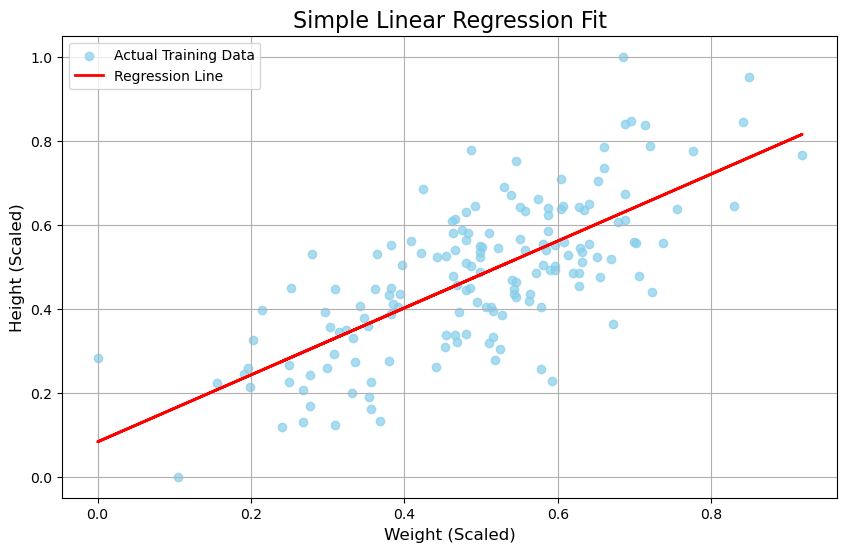

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='skyblue', label='Actual Training Data', alpha=0.7)
plt.plot(X_train, lin_reg.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression Fit', fontsize=16)
plt.xlabel('Weight (Scaled)', fontsize=12)
plt.ylabel('Height (Scaled)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

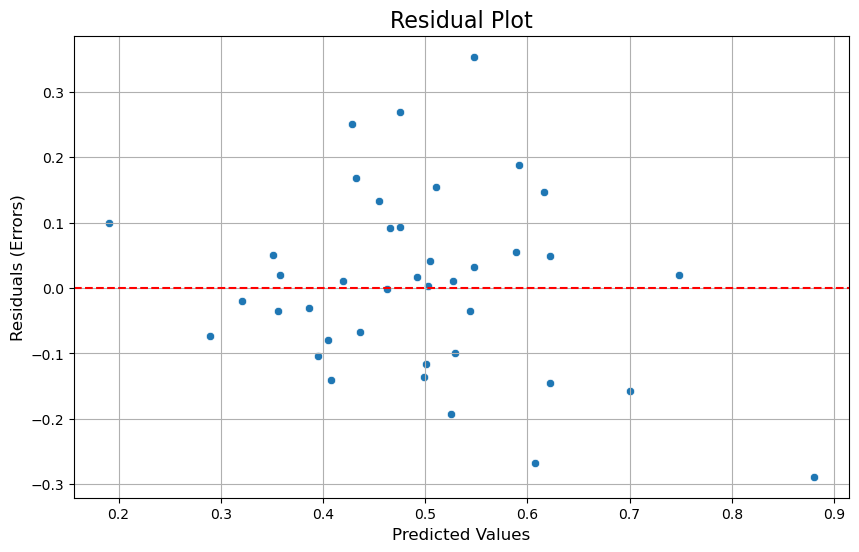

In [49]:
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Errors)', fontsize=12)
plt.grid(True)
plt.show()

### Conclusion from Plots

1.  **Regression Fit:** The plot of the regression line shows that our model has successfully captured the strong **positive correlation** in the data. As weight increases, height also tends to increase, and the line provides a good representation of this general trend.

2.  **Residual Analysis:** The residual plot is a crucial diagnostic tool. Our plot shows the errors are **randomly scattered** around the zero line with no obvious patterns. This is a good sign, suggesting that a linear model is an appropriate choice for this dataset.